In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [5]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [7]:
df['class']=(df['class']=='g').astype(int)

In [8]:
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


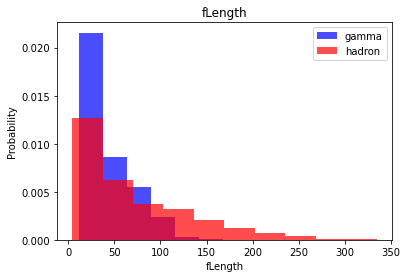

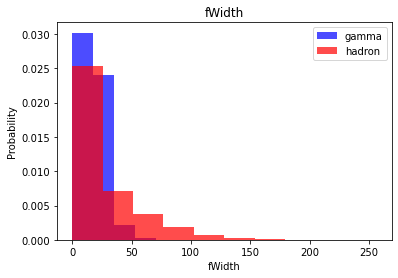

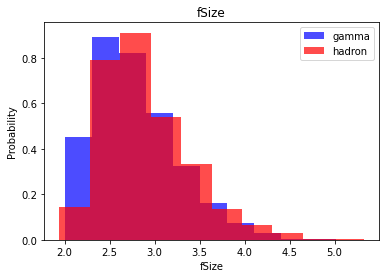

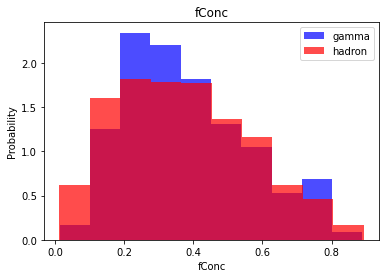

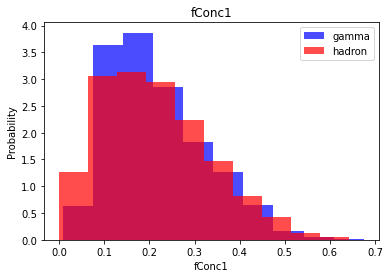

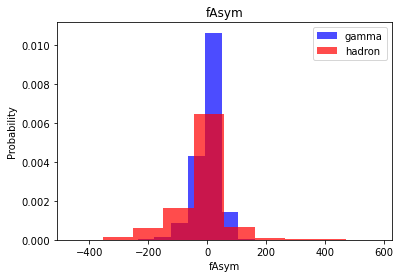

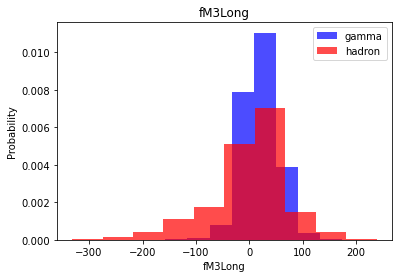

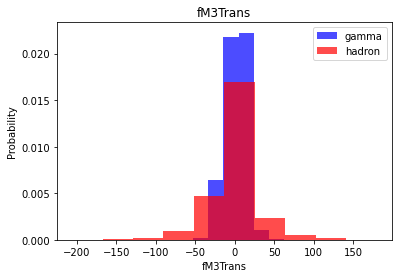

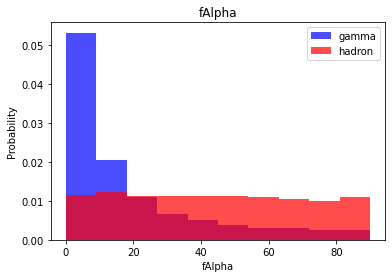

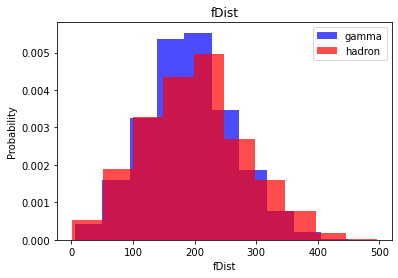

In [11]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation, test datasets


In [35]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [23]:
def scale_dataset(dataframe, oversample=False):
    X=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values
    
    scaler=StandardScaler()
    X= scaler.fit_transform(X)
    
    if oversample:
        ros=RandomOverSampler()
        X,y=ros.fit_resample(X,y)
    
    data = np.hstack((X, np.reshape(y, (-1,1))))
    
    return data, X, y

In [25]:
print(len(train[train['class']==1]))#gamma
print(len(train[train['class']==0]))

7363
4049


In [36]:
train, X_train, y_train= scale_dataset(train, oversample= True)
valid, X_valid, y_valid= scale_dataset(valid, oversample= False)
test, X_test, y_test= scale_dataset(test, oversample= False)



# kNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [48]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred= knn_model.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1309
           1       0.85      0.86      0.85      2495

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayse


In [54]:
from sklearn.naive_bayes import GaussianNB

In [57]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train, y_train)

In [59]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      1309
           1       0.75      0.90      0.82      2495

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic regression


In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train, y_train)

In [62]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1309
           1       0.85      0.82      0.83      2495

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



# SVM

In [67]:
from sklearn.svm import SVC

In [68]:
svm_model=SVC()
svm_model=svm_model.fit(X_train, y_train)

In [71]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1309
           1       0.89      0.89      0.89      2495

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [73]:
import tensorflow as tf

2024-03-18 23:15:23.590563: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-18 23:15:23.595230: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 23:15:23.597755: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 23:15:23.624569: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 23:15:24.223468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [89]:
def plot_history(history):
    fig, (ax1, ax2)=plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    plt.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    plt.grid(True)
    
    plt.show()

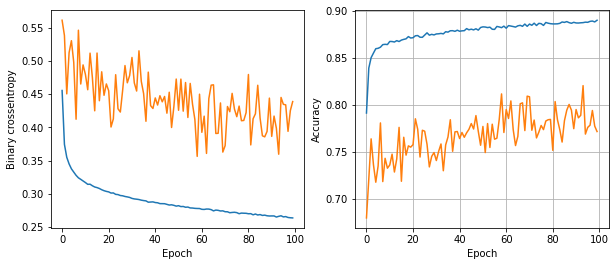

In [90]:
plot_history(history)

In [97]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                metrics=['accuracy'])
    history=nn_model.fit(
X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32


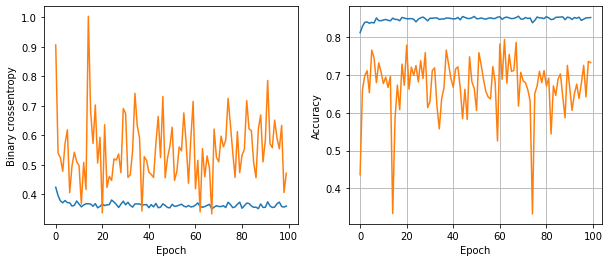

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.8457 - loss: 0.3828
16 nodes, dropout 0, lr 0.1, batch size 64


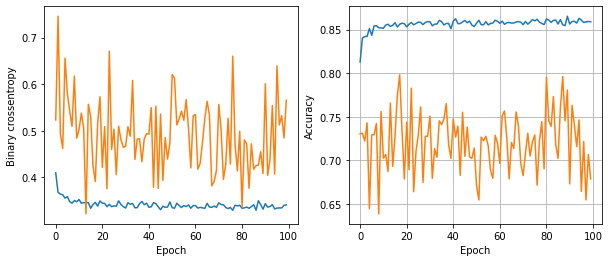

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.8722 - loss: 0.3221
16 nodes, dropout 0, lr 0.1, batch size 128


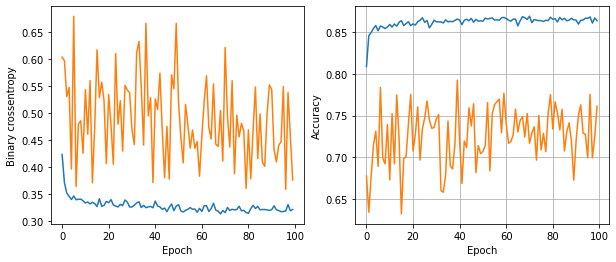

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8697 - loss: 0.3435
16 nodes, dropout 0, lr 0.005, batch size 32


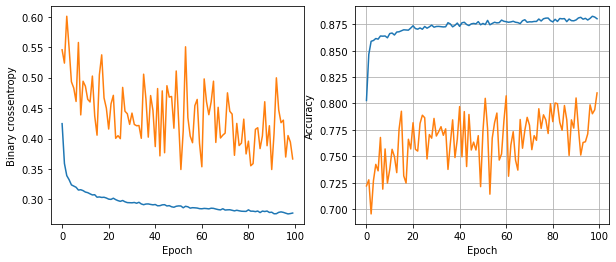

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.8659 - loss: 0.3405
16 nodes, dropout 0, lr 0.005, batch size 64


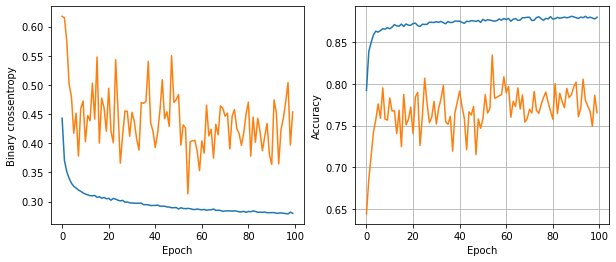

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8771 - loss: 0.3099
16 nodes, dropout 0, lr 0.005, batch size 128


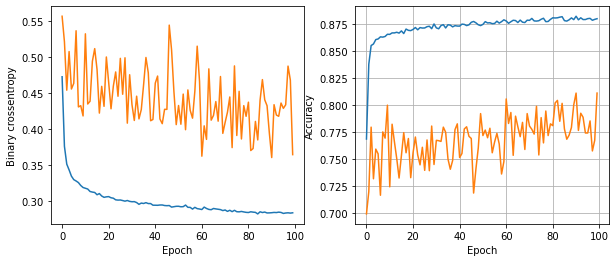

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.8640 - loss: 0.3286
16 nodes, dropout 0, lr 0.001, batch size 32


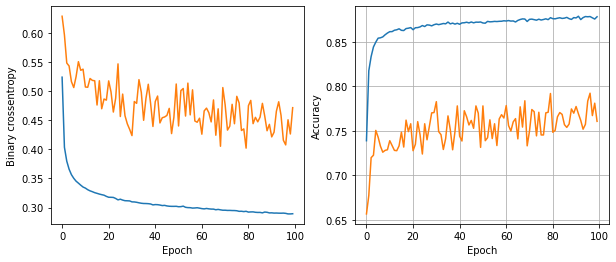

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8752 - loss: 0.3149
16 nodes, dropout 0, lr 0.001, batch size 64


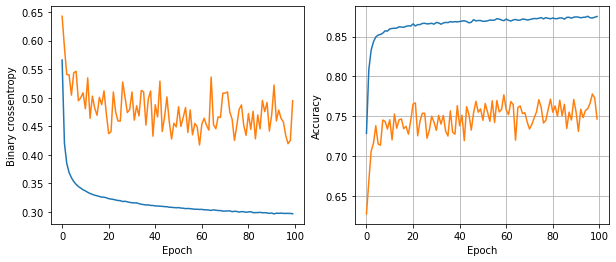

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8707 - loss: 0.3140
16 nodes, dropout 0, lr 0.001, batch size 128


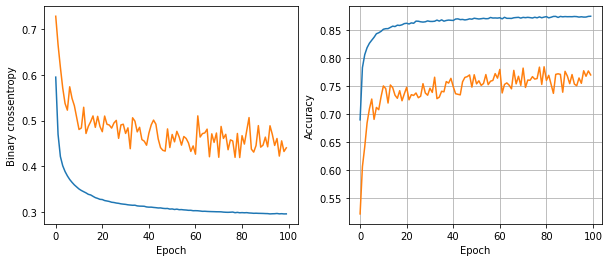

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.8734 - loss: 0.3197
16 nodes, dropout 0.2, lr 0.1, batch size 32


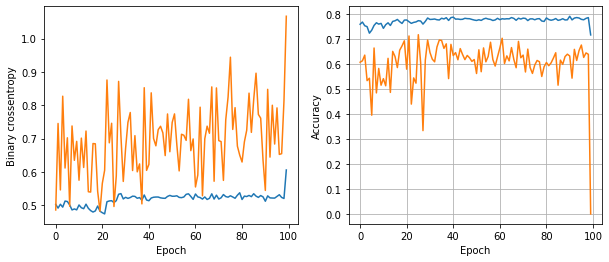

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.6616 - loss: 0.6401
16 nodes, dropout 0.2, lr 0.1, batch size 64


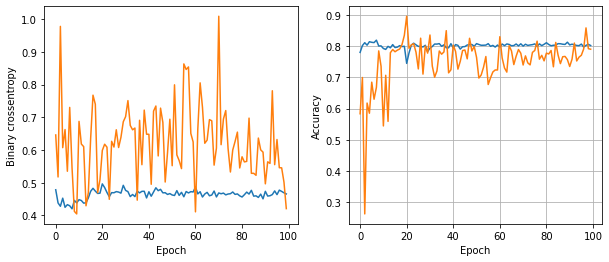

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.7980 - loss: 0.5417
16 nodes, dropout 0.2, lr 0.1, batch size 128


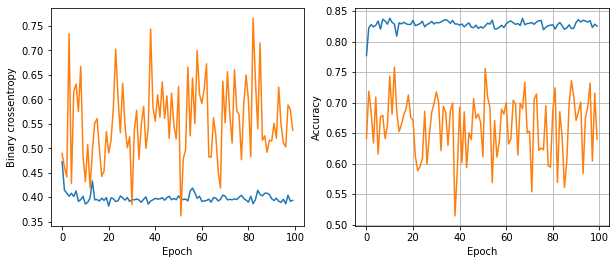

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.8565 - loss: 0.3576
16 nodes, dropout 0.2, lr 0.005, batch size 32


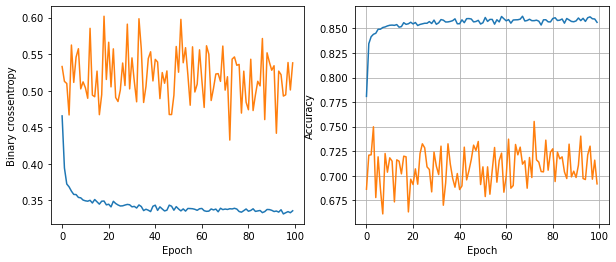

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8682 - loss: 0.3214
16 nodes, dropout 0.2, lr 0.005, batch size 64


KeyboardInterrupt: 

In [99]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                evaluation_results = model.evaluate(X_valid, y_valid)
                val_loss = evaluation_results[0]  # Assuming validation loss is the first metric
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


In [102]:
y_pred= least_loss_model.predict(X_test)
y_pred=(y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step


array([1, 1, 1, ..., 1, 1, 0])

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1309
           1       0.87      0.94      0.90      2495

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

